# MNIST Digit Classification

We will build and train a convolutional neural network (CNN) for classification of handwritten digits from the famous [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. The MNIST dataset consists of 60,000 training images and 10,000 test images. Our classes are the digits 0-9.

First, let's download the course repository, install dependencies, and import the relevant packages we'll need for this tutorial.

## Setup

In [2]:
# Python Libraries:

#Import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf 

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
assert len(tf.config.list_physical_devices('GPU')) > 0

     |████████████████████████████████| 2.1 MB 4.9 MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.2.0-py3-none-any.whl size=2115442 sha256=e74be1b1e0a46d66868a9f56c8719b7de74279bcf591cc018ec2b9dd0a8cca01
  Stored in directory: /root/.cache/pip/wheels/9a/b9/4f/99b7c8c5c75355550b83e1fcfc02956fb40c35eb01e2262877
Successfully built mitdeeplearning


In [3]:
import seaborn as sns

## 1.1 MNIST dataset 

Let's download and load the dataset and display a few random samples from it:

In [4]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11501568/11490434 [==============================] - 0s 0us/step


Our training set is made up of 28x28 grayscale images of handwritten digits. 

Let's visualize what some of these images and their corresponding training labels look like.

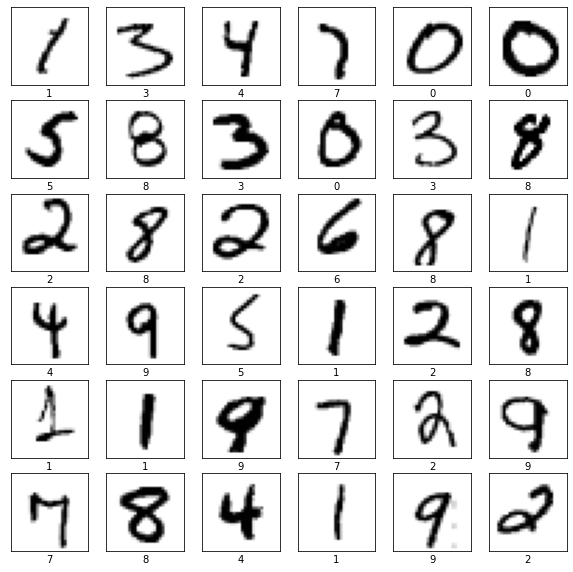

In [5]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

The dataset is ready, so now we need to build the neural network that we'll be training.

## 1.2 Convolutional Neural Network (CNN) for handwritten digit classification

Convolutional neural networks (CNNs) are particularly well-suited for a variety of tasks in computer vision, and have achieved near-perfect accuracies on the MNIST dataset. We will now build a CNN composed of two convolutional layers and pooling layers, followed by two fully connected layers, and ultimately output a probability distribution over the 10 digit classes (0-9). The CNN we will be building is depicted below:

![alt_text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab2/img/convnet_fig.png "CNN Architecture for MNIST Classification")

### Define the CNN model

We'll use the training and test datasets defined before, and proceed similarly as our fully connected network to define and train our new CNN model. To do this we will explore two layers we have not encountered before: you can use  [`keras.layers.Conv2D` ](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) to define convolutional layers and [`keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) to define the pooling layers. Use the parameters shown in the network architecture above to define these layers and build the CNN model.

In [6]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),

        # Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        # Define the second convolutional layer
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),

        # Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        # [Dense layer to output classification probabilities]
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 36)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 900)               0         
                                                                 
 dense (Dense)               (None, 128)               1

### Train and test the CNN model

Now, as before, we can define the loss function, optimizer, and metrics through the `compile` method. Compile the CNN model with an optimizer and learning rate of choice:

In [7]:
'''Define the compile operation with your optimizer and learning rate of choice'''
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

As was the case with the fully connected model, we can train our CNN using the `fit` method via the Keras API.

In [8]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 64
EPOCHS = 5

In [9]:
'''Use model.fit to train the CNN model, with the same batch_size and number of epochs previously used.'''
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 12s 9ms/step - loss: 0.1748 - accuracy: 0.9478
Epoch 2/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0532 - accuracy: 0.9836
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0367 - accuracy: 0.9887
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0288 - accuracy: 0.9908
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0220 - accuracy: 0.9929


Great! Now that we've trained the model, let's evaluate it on the test dataset using the [`evaluate`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#evaluate) method:

In [10]:
'''Use the evaluate method to test the model!'''
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0385 - accuracy: 0.9882
Test accuracy: 0.9882000088691711


What is the highest accuracy you're able to achieve using the CNN model, and how does the accuracy of the CNN model compare to the accuracy of the simple fully connected network? What optimizers and learning rates seem to be optimal for training the CNN model? 

### Make predictions with the CNN model

With the model trained, we can use it to make predictions about some images. The [`predict`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#predict) function call generates the output predictions given a set of input samples.


In [11]:
predictions = cnn_model.predict(test_images)

With this function call, the model has predicted the label for each image in the testing set. Let's take a look at the prediction for the first image in the test dataset:

In [12]:
predictions[0]

array([1.9697091e-09, 1.1821507e-07, 1.2692972e-07, 4.7468316e-08,
       7.2453292e-09, 7.3330004e-09, 1.3666778e-12, 9.9999964e-01,
       8.9085809e-08, 2.1058032e-08], dtype=float32)

As you can see, a prediction is an array of 10 numbers. Recall that the output of our model is a probability distribution over the 10 digit classes. Thus, these numbers describe the model's "confidence" that the image corresponds to each of the 10 different digits. 

Let's look at the digit that has the highest confidence for the first image in the test dataset:

In [13]:
'''Identify the digit with the highest confidence prediction for the first
    image in the test dataset. '''
prediction = np.argmax(predictions[0]) 

print(prediction)

7


So, the model is most confident that this image is a "???". We can check the test label (remember, this is the true identity of the digit) to see if this prediction is correct:

Label of this digit is: 7


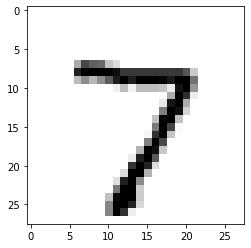

In [14]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

It is! Let's visualize the classification results on the MNIST dataset. We will plot images from the test dataset along with their predicted label, as well as a histogram that provides the prediction probabilities for each of the digits:

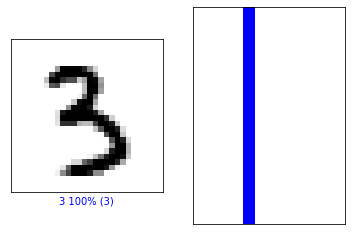

In [15]:
#@title Change the slider to look at the model's predictions! { run: "auto" }

image_index = 32 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)

We can also plot several images along with their predictions, where correct prediction labels are blue and incorrect prediction labels are grey. The number gives the percent confidence (out of 100) for the predicted label. Note the model can be very confident in an incorrect prediction!

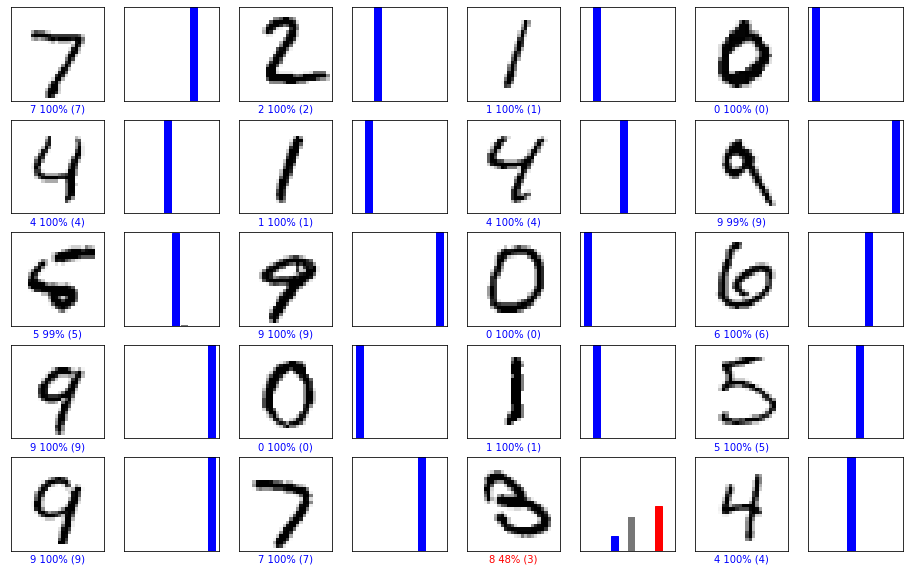

In [16]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)


### Confusion Matrix

In [17]:
predicted_label = []
for i in range(len(predictions)):
  predicted_label.append(np.argmax(predictions[i]))

In [18]:
cnf_matrix = tf.math.confusion_matrix(
    test_labels, predicted_label, num_classes=None, weights=None, dtype=tf.dtypes.int32,
    name=None
)
print(cnf_matrix)

tf.Tensor(
[[ 977    1    0    0    0    0    1    0    0    1]
 [   0 1133    0    0    0    2    0    0    0    0]
 [   1    1 1023    0    2    1    0    3    1    0]
 [   0    0    2  991    0   13    0    1    3    0]
 [   0    0    0    0  982    0    0    0    0    0]
 [   0    0    0    2    0  888    1    0    1    0]
 [   4    2    0    0    2    9  940    0    1    0]
 [   0    5    3    0    0    0    0 1017    1    2]
 [   3    0    1    0    0    1    1    0  967    1]
 [   0    2    0    0   17   11    0    4   11  964]], shape=(10, 10), dtype=int32)


In [19]:
class_names = np.unique(test_labels)

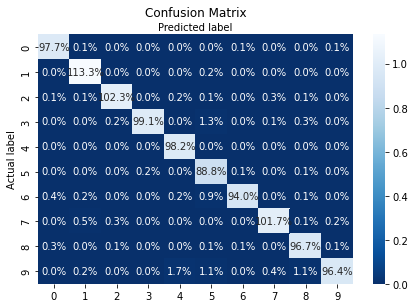

In [42]:
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(cnf_matrix/1000, annot = True, cmap = 'Blues_r', fmt='.1%')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## 1.3 Conclusion

In this part of the lab, you had the chance to play with different MNIST classifiers with different architectures (fully-connected layers only, CNN), and experiment with how different hyperparameters affect accuracy (learning rate, etc.). The next part of the lab explores another application of CNNs, facial detection, and some drawbacks of AI systems in real world applications, like issues of bias. 

# References

© MIT 6.S191: Introduction to Deep Learning. MNIST Solution. Available online: https://colab.research.google.com/github/aamini/introtodeeplearning/blob/master/lab2/solutions/Part1_MNIST_Solution.ipynb